<a href="https://colab.research.google.com/github/emirhangull/StrokePrediction/blob/edamete/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emirhan Gül
Efe Arda Uzunova
Mete Oktar

# Inme (Stroke) Veri Analizi (EDA)
Bu bölümde veri setinin genel yapısını inceleyip, eksik değerler, sınıf dağılımı, sayısal ve kategorik değişkenlerin dağılımları ile temel ilişkileri görselleştireceğiz.

Hedefler:
- Veri setini yükleme ve genel bakış (boyut, sütunlar, tipler)
- Eksik değer analizi
- Hedef değişken dağılımı (sınıf dengesizliği)
- Sayısal değişkenler: dağılım ve aykırı değerler
- Kategorik değişkenler: sınıf kırılımında dağılımlar
- Korelasyon ısı haritası (sayısal özellikler + hedef)

Not: Bu aşamada yalnızca keşifsel analiz yapılır; dönüşüm/ölçekleme gibi adımlar bir sonraki bölümde ele alınacaktır.

In [13]:
# Gerekli Kütüphaneler (EDA)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Görsel ve çıktı ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style="whitegrid", palette="Set2",
        rc={"axes.spines.right": False, "axes.spines.top": False})

%matplotlib inline

In [14]:
# 1) Veriyi Yükleme
import os

df = pd.read_csv('data.csv')

print(f"Satır: {df.shape[0]:,} | Sütun: {df.shape[1]}")
display(df.head())

Satır: 5,110 | Sütun: 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [15]:
# 2) Genel Bakış: sütunlar, tipler, özet istatistikler
print('\nSütunlar:')

for i in list(df.columns):
    print(i)

print('\nVeri Tipleri:')
print(df.dtypes)

print('\nSayısal Özet :')
display(df.describe())


Sütunlar:
id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke

Veri Tipleri:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Sayısal Özet :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,"5,110.00","5,110.00","5,110.00","5,110.00","5,110.00","4,909.00","5,110.00"
mean,"36,517.83",43.23,0.10,0.05,106.15,28.89,0.05
std,"21,161.72",22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,"17,741.25",25.00,0.00,0.00,77.25,23.50,0.00
50%,"36,932.00",45.00,0.00,0.00,91.88,28.10,0.00
75%,"54,682.00",61.00,0.00,0.00,114.09,33.10,0.00
max,"72,940.00",82.00,1.00,1.00,271.74,97.60,1.00


In [16]:
print("N/A or Unknown values count by column")
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)
df.isna().sum()


N/A or Unknown values count by column


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Görüldüğü gibi sadece bmi (201) ve smoking status (1544) sütunlarında N/A ve unknown değerleri var.

In [17]:
print(
    f"BMI NaN sayısı: {df['bmi'].isnull().sum()} | "
    f"BMI NaN oranı: {df['bmi'].isnull().mean():.2%}\n"
    f"Smoking Unknown sayısı: {df['smoking_status'].isnull().sum()} | "
    f"Smoking Unknown oranı: {df['smoking_status'].isnull().mean():.2%}\n"
)
display(df['bmi'].describe())
display(df['smoking_status'].value_counts())




BMI NaN sayısı: 201 | BMI NaN oranı: 3.93%
Smoking Unknown sayısı: 1544 | Smoking Unknown oranı: 30.22%



,bmi
count,"4,909.00"
mean,28.89
std,7.85
min,10.30
25%,23.50
50%,28.10
75%,33.10
max,97.60


,count
smoking_status,
never smoked,1892
formerly smoked,885
smokes,789


Eksik değer sayıları ve yüzdeleri:


,missing,percent
smoking_status,1544,30.22
bmi,201,3.93


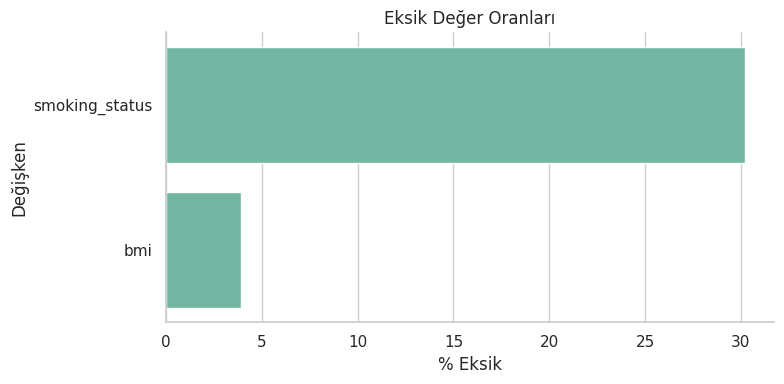

In [18]:
# 3) Eksik Değer Analizi


missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df)).sort_values(ascending=False)
missing_df = pd.DataFrame({
    'missing': missing_counts,
    'percent': (missing_pct * 100).round(2)
})

print('Eksik değer sayıları ve yüzdeleri:')
display(missing_df[missing_df['missing'] > 0])

plt.figure(figsize=(8, 4))
sns.barplot(x=missing_df[missing_df['missing']>0]['percent'],
            y=missing_df[missing_df['missing']>0].index,
            orient='h', color='#66c2a5')
plt.xlabel('% Eksik')
plt.ylabel('Değişken')
plt.title('Eksik Değer Oranları')
plt.tight_layout()
plt.show()

BMI'daki NaN değerleri medyan ile doldurulacak, Smoking_Status'teki Unknown değerleri ise ayrı bir kategori olarak ele alınacaktır.

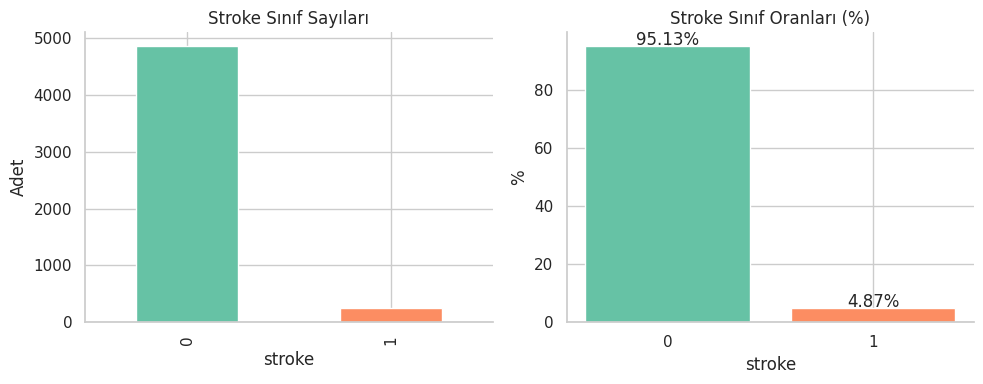

Sınıf oranları (%):
stroke
0   95.13
1    4.87
Name: count, dtype: float64


In [19]:
# 4)veride stroke dagilimi nasıl
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
vc = df['stroke'].value_counts().sort_index()
vc.plot(kind='bar', ax=ax[0], color=['#66c2a5', '#fc8d62'])
ax[0].set_title('Stroke Sınıf Sayıları')
ax[0].set_xlabel('stroke')
ax[0].set_ylabel('Adet')

ratio = (vc / vc.sum() * 100).round(2)
ax[1].bar(ratio.index.astype(str), ratio.values, color=['#66c2a5', '#fc8d62'])
ax[1].set_title('Stroke Sınıf Oranları (%)')
ax[1].set_xlabel('stroke')
ax[1].set_ylabel('%')
for i, v in enumerate(ratio.values):
    ax[1].text(i, v + 0.5, f"{v}%", ha='center')
plt.tight_layout()
plt.show()

print('Sınıf oranları (%):')
print(ratio)

İnme tahmininde bulunduğumuz için true positive'leri kaçırmamalıyız. Yani bütün true positiveleri yakalamamız ve false negative sayısını olabildiğince minimize etmemiz gerekiyor. Özetle Recall değerimizin 1'e olabildiğince olması gerek.

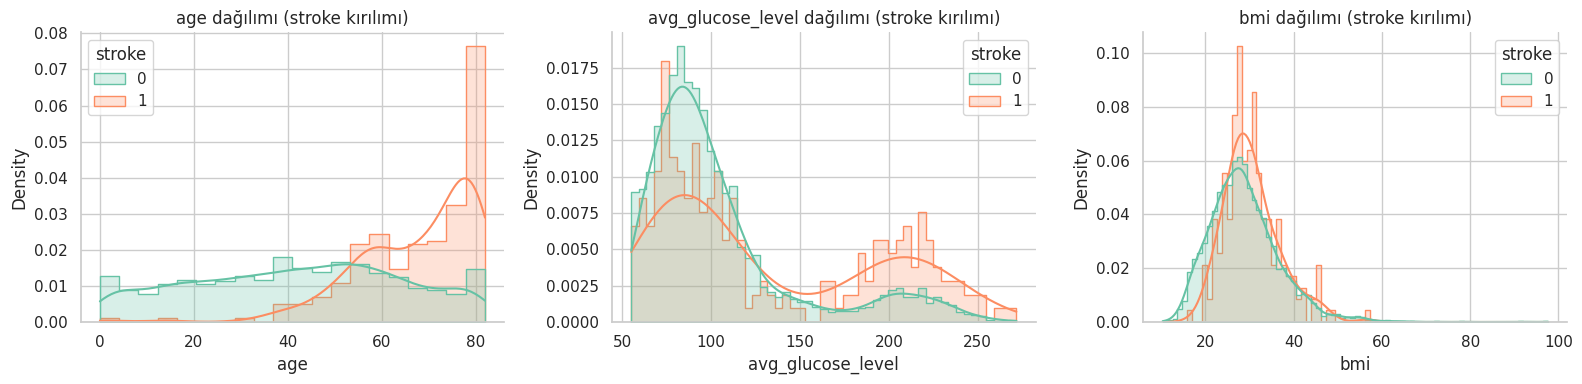

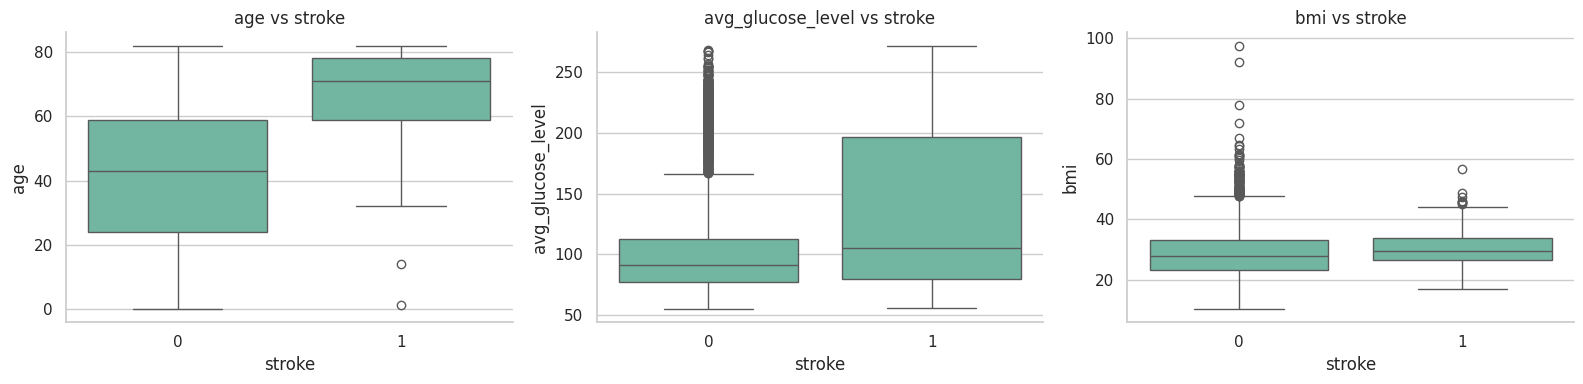

In [20]:

num_cols = ['age', 'avg_glucose_level', 'bmi']

# Histogram
fig, axes = plt.subplots(1, len(num_cols), figsize=(16, 4))
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='stroke', element='step', stat='density',
                 common_norm=False, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} dağılımı (stroke kırılımı)')
plt.tight_layout()
plt.show()

# Boxplot
fig, axes = plt.subplots(1, len(num_cols), figsize=(16, 4))
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='stroke', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs stroke')
plt.tight_layout()
plt.show()

Histogram dağılımlarından yaş faktörünün inme geçirme ile yakından ilişkili olduğunu görebiliriz. Yaş arttıkça inme oranı artıyor.

Stroke ve avg glucose level grafiğinden de age kadar olmasa da şeker seviyesinin de inme geçirip geçirmemeyle ilişkili olduğunu görebiliyoruz.
Burada dikkat etmemiz gereken iki durum var

1- İnme değerinin 80 glucose_level değerlerinde peak etmesinin sebebi tüm insanlarda 70-126 mg/dL arasının normal değer kabul edilmesi ve insanların çoğunun bu aralıkta bulunması. Yani 80 civarında inme geçiren hastaların avg glucose degeriyle bir alakası yok denebilir.

2- Fakat inme değerinin 200 mg/dL civarında yeniden artmasının sebebi şekeri yüksek insanların inme geçirmeye daha eğilimli olması olarak yorumlanabilir.

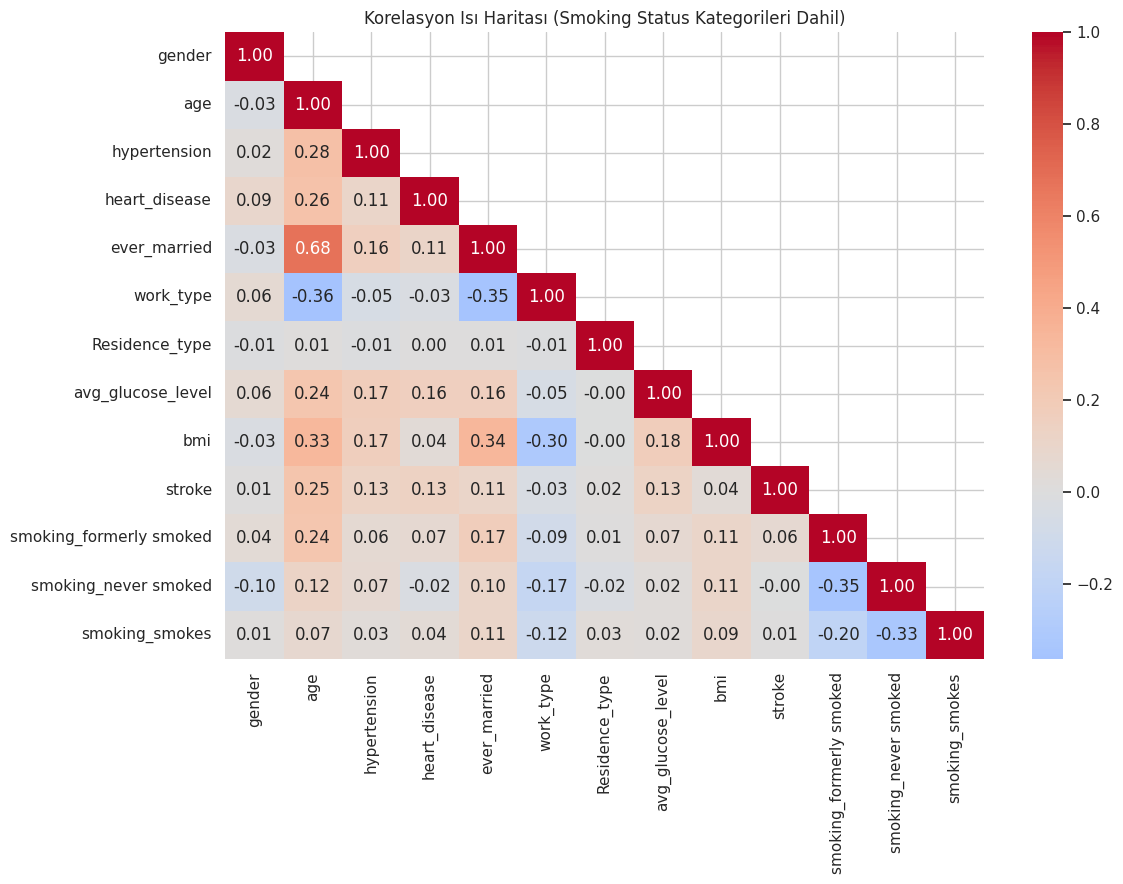


Stroke ile Korelasyonlar:
stroke                     1.00
age                        0.25
heart_disease              0.13
avg_glucose_level          0.13
hypertension               0.13
ever_married               0.11
smoking_formerly smoked    0.06
bmi                        0.04
Residence_type             0.02
smoking_smokes             0.01
gender                     0.01
smoking_never smoked      -0.00
work_type                 -0.03
Name: stroke, dtype: float64


In [27]:
# 6) Korelasyon Isı Haritası

# ana df etkilenmemesi için ayrı bir df
df_corr = df.copy().drop(columns=['id', 'age_group'], errors='ignore')

# smoking status'u one-hot-encode et
smoke_dummies = pd.get_dummies(df_corr['smoking_status'], prefix='smoking')
df_corr = pd.concat([df_corr.drop(columns=['smoking_status']), smoke_dummies], axis=1)

# kategorikleri label ile encoding
cat_cols = df_corr.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in cat_cols:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

corr_all = df_corr.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr_all, dtype=bool), k=1)

#heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_all, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Korelasyon Isı Haritası")
plt.tight_layout()
plt.show()

print("\nStroke ile Korelasyonlar:")
print(corr_all['stroke'].sort_values(ascending=False))

Bu korelasyon haritasından da görülebileceği gibi stroke ile korelasyonda yaş en büyük faktör iken, avg_glucose_level, heart_disease ve hypertension 2. sırada geliyor.

Öznitelikler arasındaki korelasyonları görebilmek de bu grafikten mümkün.
Yaş ve ever_married gibi

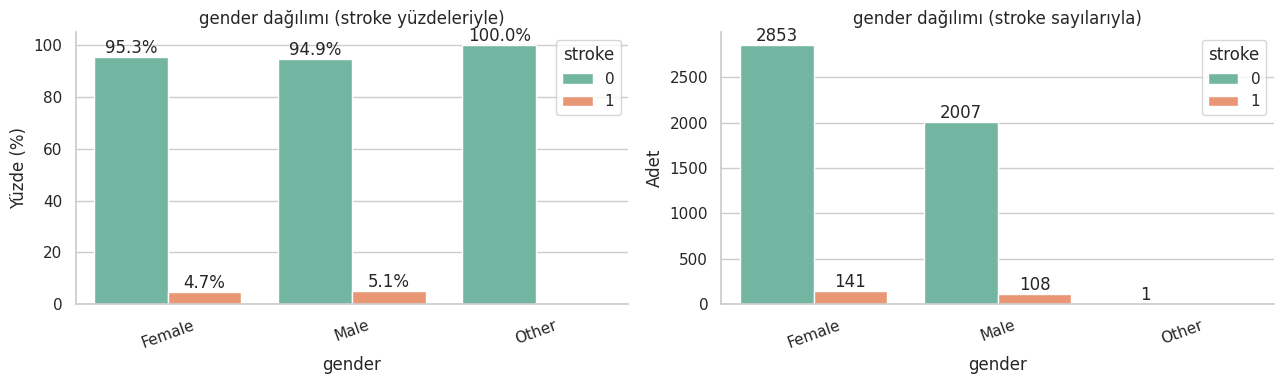

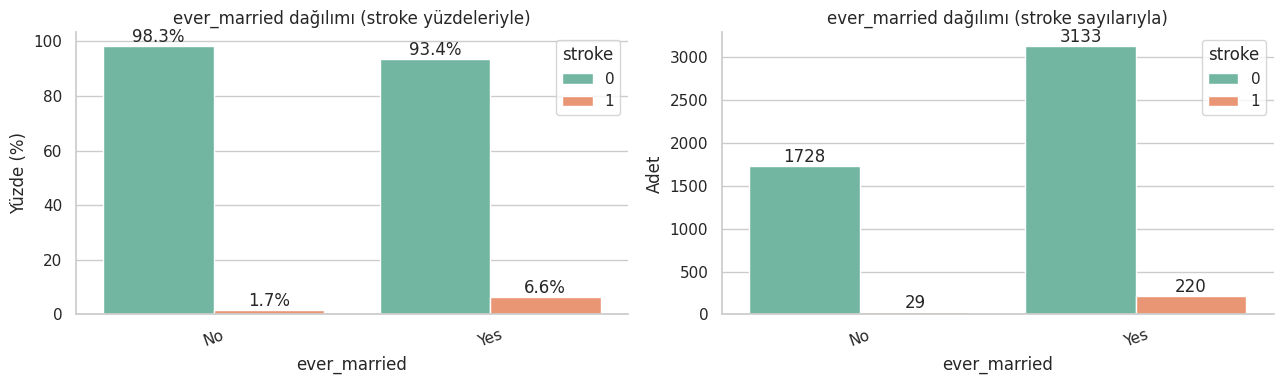

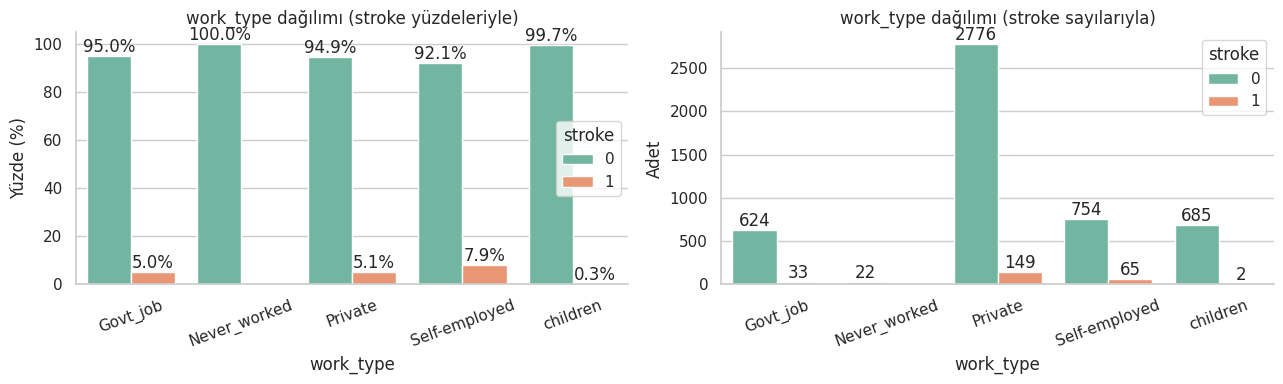

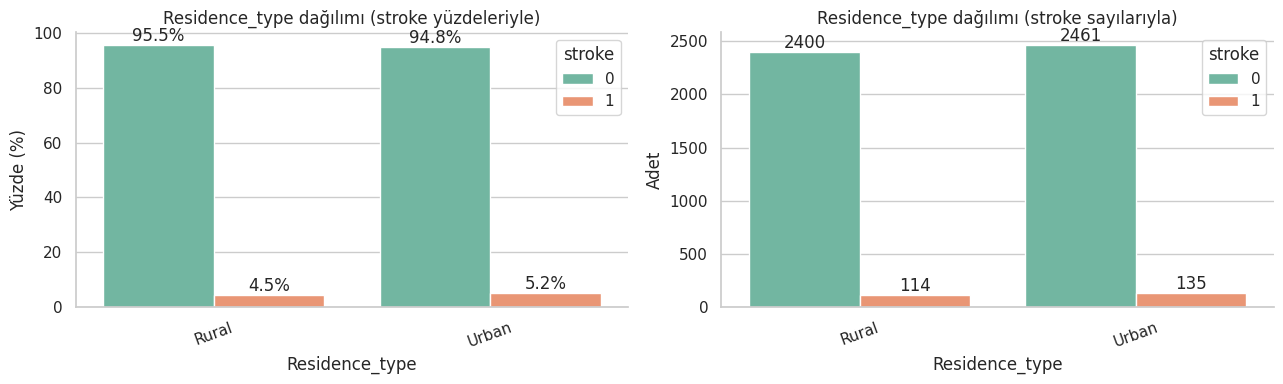

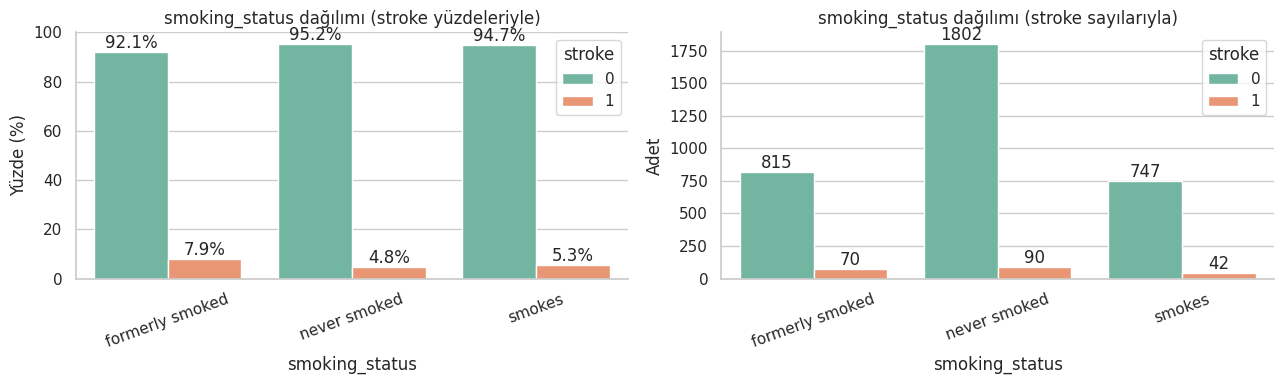

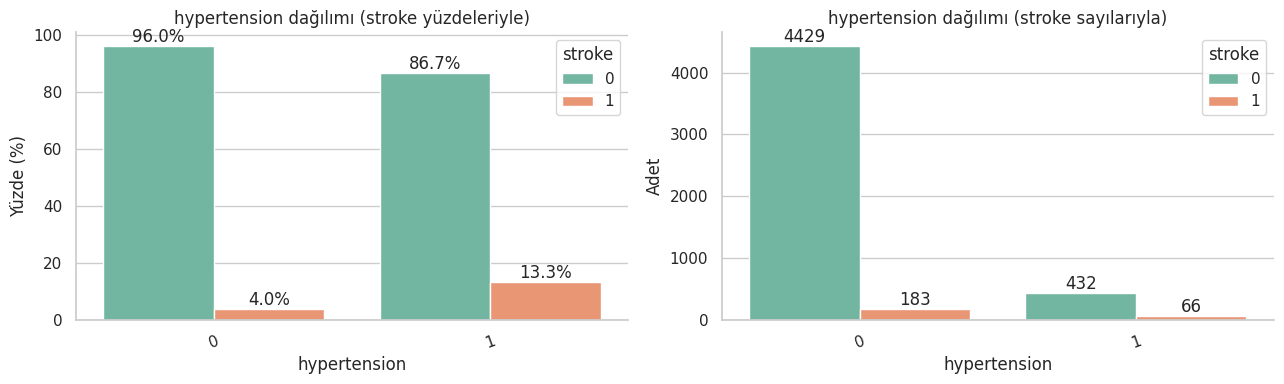

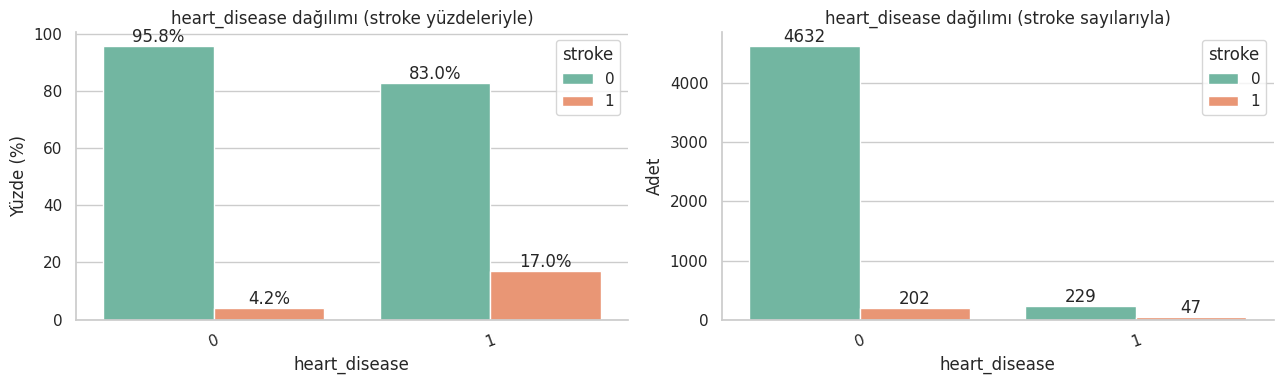

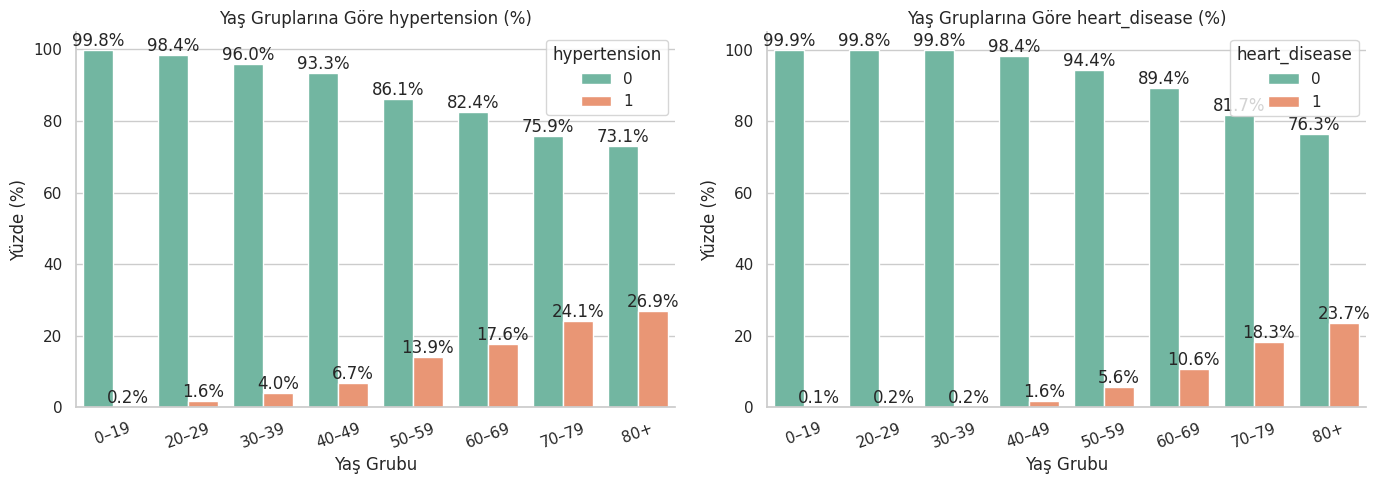

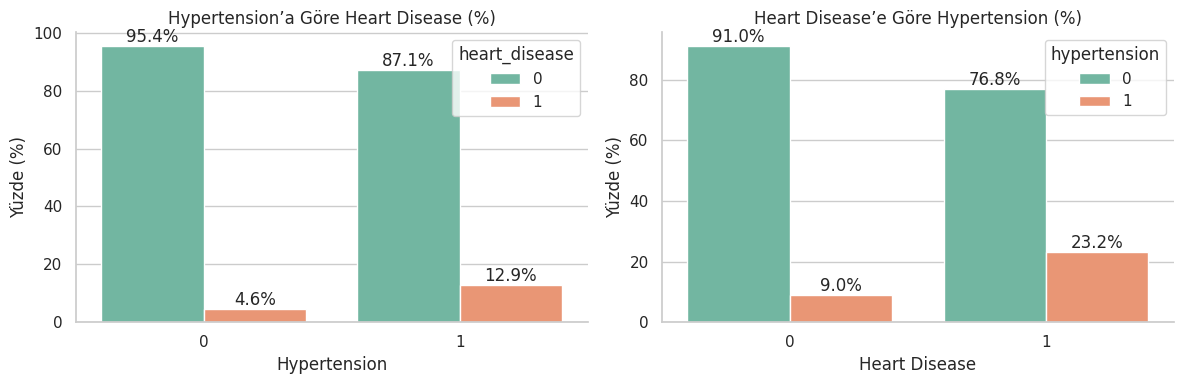

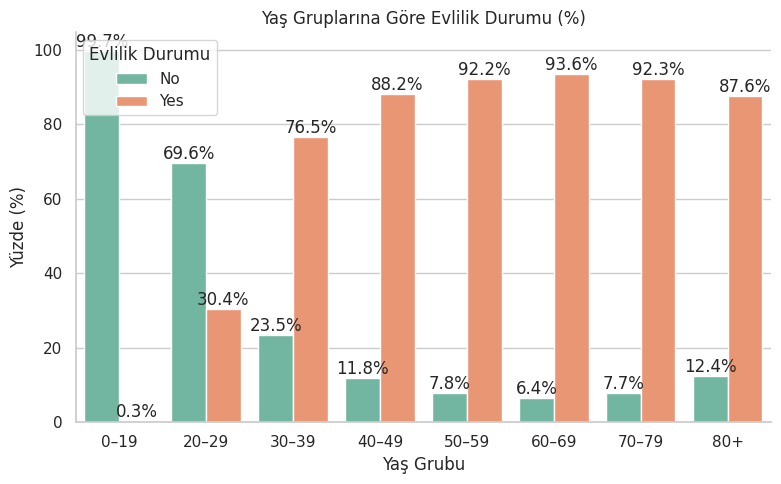

In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# satir bazinda yuzde hesapliyor
def pct_table(df, x, hue):
    return (
        df.groupby([x, hue], observed=False)
          .size()
          .groupby(level=0, observed=False)
          .transform(lambda s: 100 * s / s.sum())
          .reset_index(name='percent')
    )

cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type',
            'smoking_status', 'hypertension', 'heart_disease']

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))

    # percentile graph
    data_pct = pct_table(df, col, 'stroke')
    ax = sns.barplot(data=data_pct, x=col, y='percent', hue='stroke', ax=axes[0])
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%')
    axes[0].set_title(f'{col} dağılımı (stroke yüzdeleriyle)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Yüzde (%)')
    axes[0].tick_params(axis='x', rotation=20)

    # sayisal graph
    data_count = df.groupby([col, 'stroke'], observed=False).size().reset_index(name='count')
    ax2 = sns.barplot(data=data_count, x=col, y='count', hue='stroke', ax=axes[1])
    for c in ax2.containers:
        ax2.bar_label(c, fmt='%d')
    axes[1].set_title(f'{col} dağılımı (stroke sayılarıyla)')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Adet')
    axes[1].tick_params(axis='x', rotation=20)

    plt.tight_layout()
    plt.show()

#age binleri
bins   = [0, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['0–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
targets = ['hypertension', 'heart_disease']
#yas gruplarina gore hypertension ve heartdisease
for i, h in enumerate(targets):
    d = pct_table(df, 'age_group', h)
    ax = axes[i]
    sns.barplot(data=d, x='age_group', y='percent', hue=h, ax=ax)
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%')
    ax.set_title(f'Yaş Gruplarına Göre {h} (%)')
    ax.set_xlabel('Yaş Grubu')
    ax.set_ylabel('Yüzde (%)')
    ax.legend(title=h)
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# hypertension'u olan insanlar heart_disease'e daha mı yatkın
data_ht_hd = pct_table(df, 'hypertension', 'heart_disease')
sns.barplot(data=data_ht_hd, x='hypertension', y='percent',
            hue='heart_disease', ax=axes[0])
for c in axes[0].containers:
    axes[0].bar_label(c, fmt='%.1f%%')
axes[0].set_title('Hypertension’a Göre Heart Disease (%)')
axes[0].set_xlabel('Hypertension'); axes[0].set_ylabel('Yüzde (%)')

# heart_disease'i bulunan insanlar hypertension'a daha mı yatkın
data_hd_ht = pct_table(df, 'heart_disease', 'hypertension')
sns.barplot(data=data_hd_ht, x='heart_disease', y='percent',
            hue='hypertension', ax=axes[1])
for c in axes[1].containers:
    axes[1].bar_label(c, fmt='%.1f%%')
axes[1].set_title('Heart Disease’e Göre Hypertension (%)')
axes[1].set_xlabel('Heart Disease'); axes[1].set_ylabel('Yüzde (%)')

plt.tight_layout()
plt.show()

#yas gruplarina gore ever_married olup olmadigi
data_age_married = pct_table(df, 'age_group', 'ever_married')
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=data_age_married, x='age_group', y='percent', hue='ever_married')
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%')
plt.title('Yaş Gruplarına Göre Evlilik Durumu (%)')
plt.xlabel('Yaş Grubu'); plt.ylabel('Yüzde (%)')
plt.legend(title='Evlilik Durumu')
plt.tight_layout(); plt.show()


Yukarıdaki kategorik veri grafiklerinden de ilk bakışta heart_disease ve hypertension ve ever_married verilerinin inme geçirip geçirmemeyle diğer değerlere göre daha ilişkili olduğunu görebiliriz. Fakat bu verilerin birbirlerinden bağımsız olmadığını, hem birbirleriyle hem de yaş ile ilişkili olduğunu göz önünde bulundurmalıyız. Örneğin:

1- yaş arttıkça ever_married değerinin 1 olma eğilimi artıyor

2- yaş arttıkça hypertension ve heart_disease olma eğilimi artıyor

3- heart_disease olduğu takdirde hypertension olma eğilimi artıyor

Yani yaş özniteliğinin diğer öznitelikleri de etkilediğini ve inme geçirip geçirmemenin en büyük indikatörü olduğunu anlayabiliriz.

Önceden sigara içmiş olmanın ya da halen sigara içiyor olmanın da inme riskini arttırdığını da söylemek mümkün.